# YOLOv5 Instance Segmentation

This notebook is for running inference on images using the YOLOv5 instance segmentation models. Mainly, we use two models, `yolov5n-seg` and `yolovx-seg`. 

Along with that, also use `--retina-masks` flag to get outputs on native resolution images.

In [1]:
import matplotlib.pyplot as plt
import os
import glob
import requests
import zipfile

## Download Data

In [2]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
        
download_file(
    'https://www.dropbox.com/s/80y1ebk254d2ypg/images.zip?dl=1',
    'images.zip'
)

In [3]:
# Unzip the data file
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip('images.zip')

Extracted all


## Clone the YOLOv5 Repository

In [4]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

In [5]:
%cd yolov5/

/media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Getting_Started_with_Instance_Segmentation/notebooks/yolov5


In [6]:
!pip install -r requirements.txt

## Inference on Images

### Using YOLOv5 Nano Segmentation Model

In [7]:
!python segment/predict.py --weights yolov5n-seg.pt --source images/ --name yolov5n_seg --exist-ok

segment/predict: weights=['yolov5n-seg.pt'], source=images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5n_seg, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.9.15 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce GTX 1060, 6078MiB)

Fusing layers... 
YOLOv5n-seg summary: 224 layers, 1986637 parameters, 0 gradients, 7.1 GFLOPs
image 1/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Getting_Started_with_Instance_Segmentation/notebooks/yolov5/images/image_1.jpg: 448x640 19 persons, 9.1ms
image 2/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Getting_Started_with_Instance_Segmentation/notebook

## Visualize Images

In [8]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

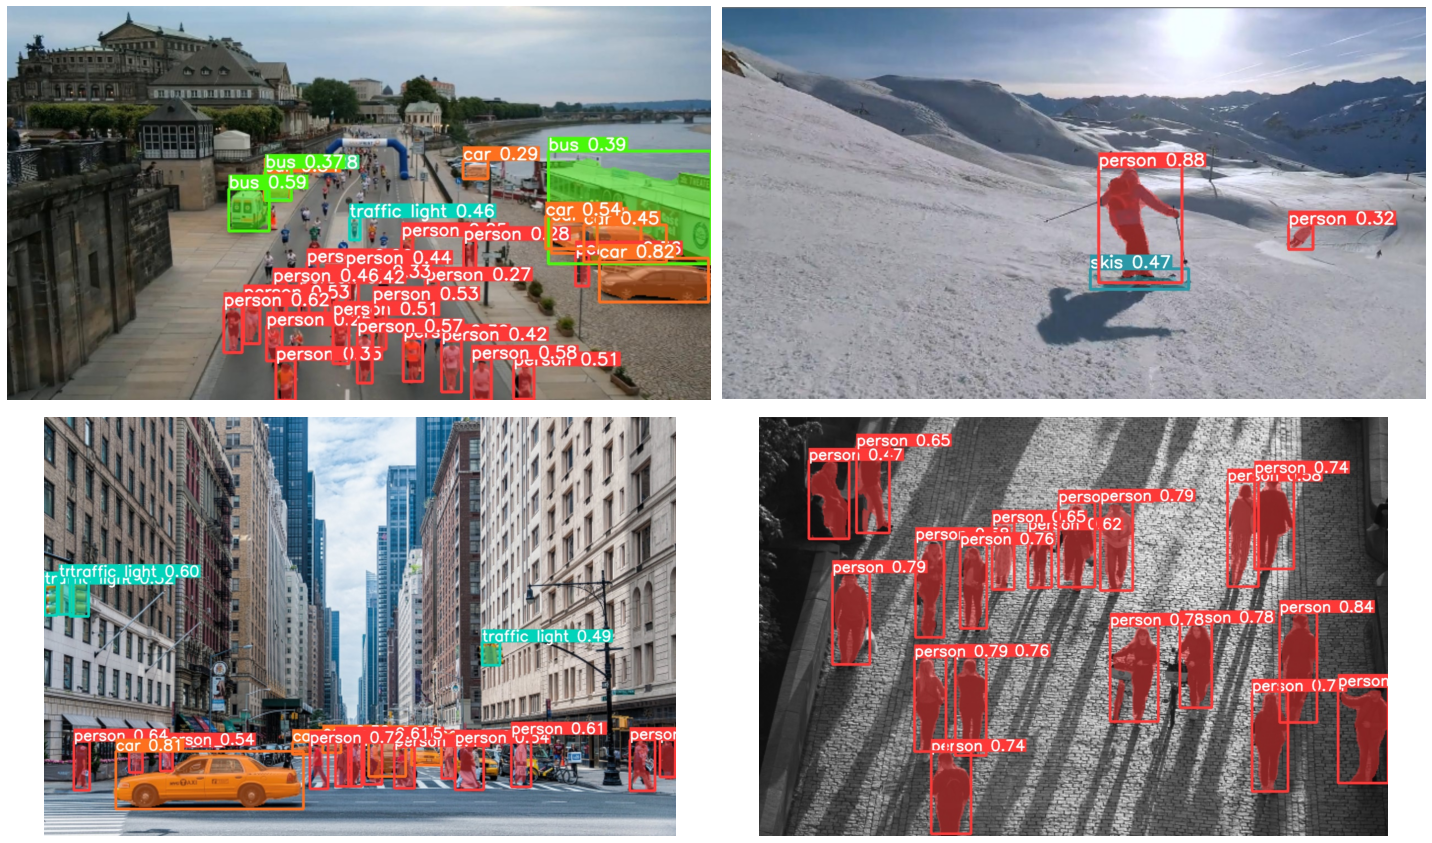

In [9]:
visualize('runs/predict-seg/yolov5n_seg/')

### Using YOLOv5X Segmentation Model

In [10]:
!python segment/predict.py --weights yolov5x-seg.pt --source images/ --name yolov5x_seg --exist-ok

segment/predict: weights=['yolov5x-seg.pt'], source=images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5x_seg, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.9.15 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce GTX 1060, 6078MiB)

Fusing layers... 
YOLOv5x-seg summary: 455 layers, 88774445 parameters, 0 gradients, 265.7 GFLOPs
image 1/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Getting_Started_with_Instance_Segmentation/notebooks/yolov5/images/image_1.jpg: 448x640 20 persons, 7 handbags, 79.9ms
image 2/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Getting_Started_with_Instance_Segme

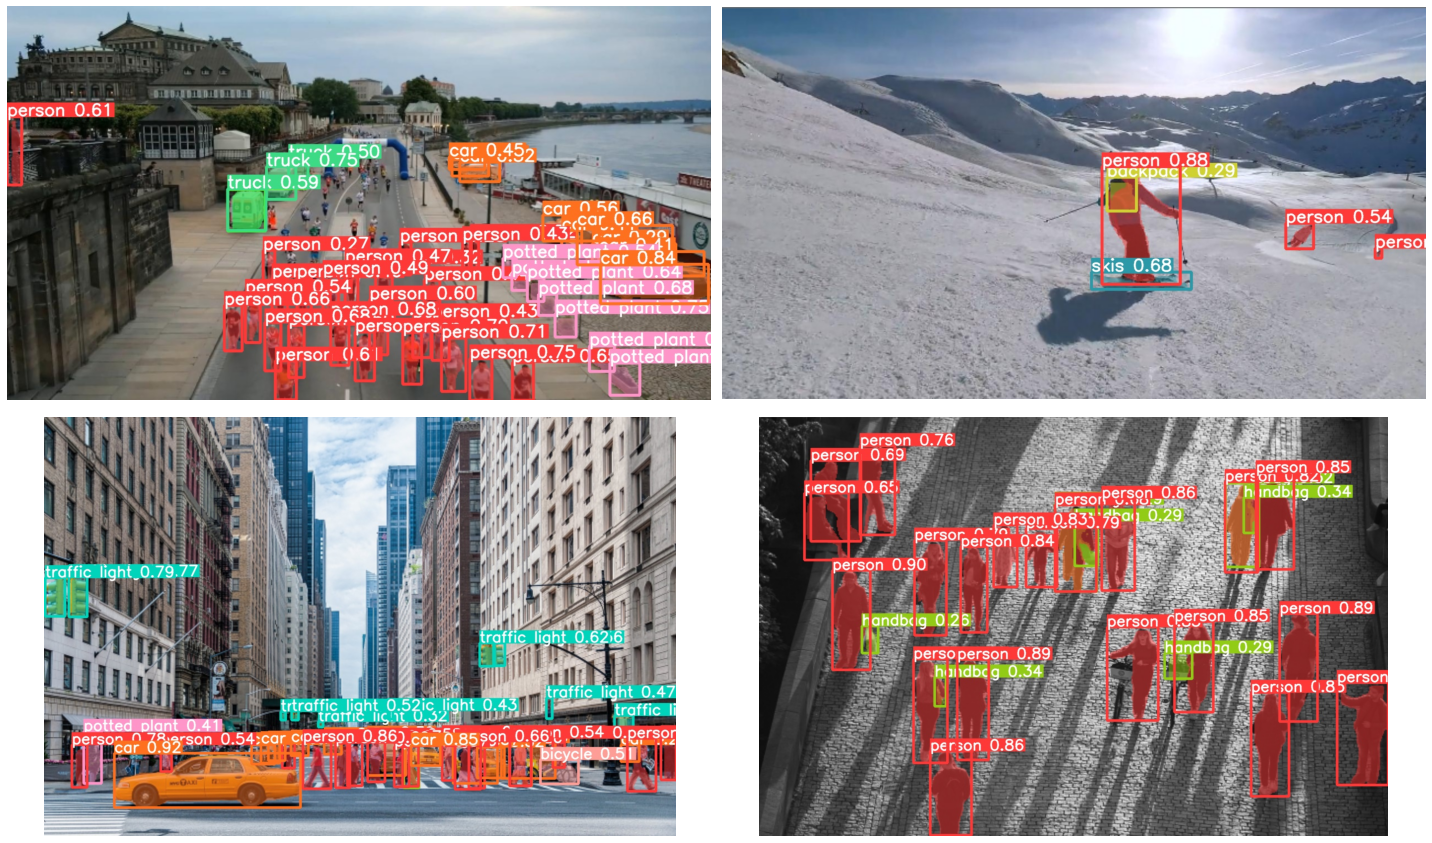

In [11]:
visualize('runs/predict-seg/yolov5x_seg/')

### Using `--retina-masks`

In [12]:
!python segment/predict.py --weights yolov5x-seg.pt --source images/ --name yolov5x_seg_retina_masks --exist-ok --retina-masks

segment/predict: weights=['yolov5x-seg.pt'], source=images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5x_seg_retina_masks, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=True
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.9.15 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce GTX 1060, 6078MiB)

Fusing layers... 
YOLOv5x-seg summary: 455 layers, 88774445 parameters, 0 gradients, 265.7 GFLOPs
image 1/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Getting_Started_with_Instance_Segmentation/notebooks/yolov5/images/image_1.jpg: 448x640 20 persons, 7 handbags, 78.1ms
image 2/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Getting_Started_with_In

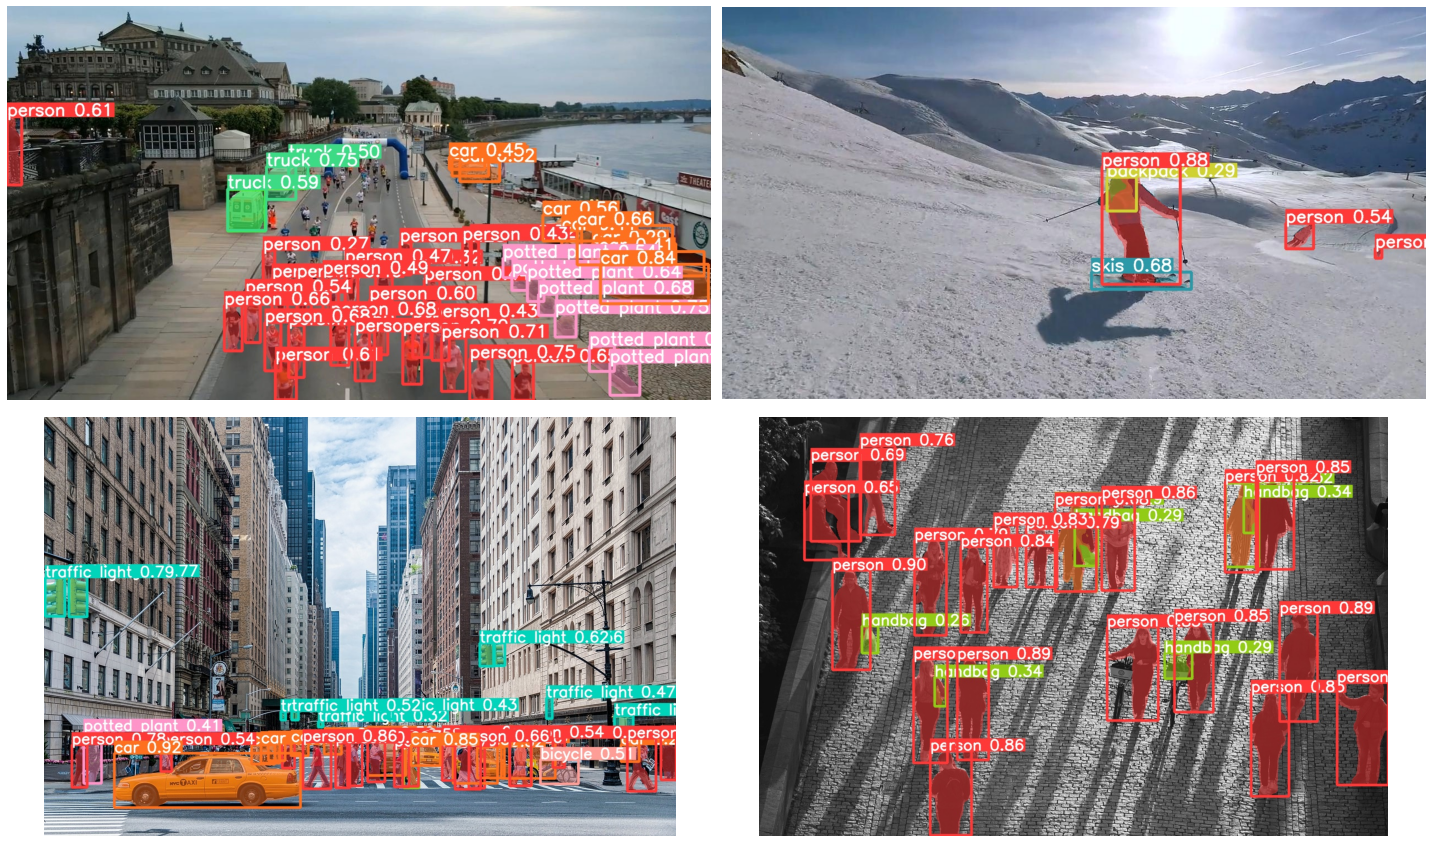

In [13]:
visualize('runs/predict-seg/yolov5x_seg_retina_masks/')